# KMeans Clustering Algorithm

## Predict the Optimum Number of Clusters for Iris Dataset

### Importing Required Python Libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Iris Dataset and Named it to df

In [2]:
df=pd.read_csv('iris.csv')

### Data Cleaning : Checking for Null and Duplicate Values

In [11]:
df.isnull().head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


<AxesSubplot:>

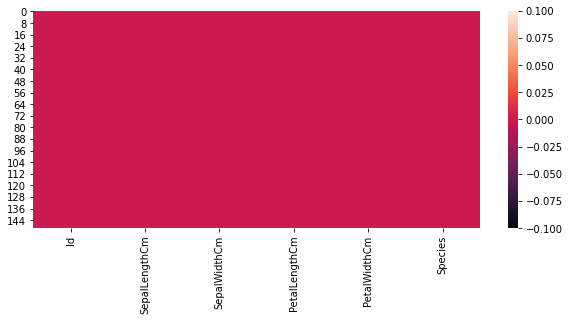

In [5]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull())

In [9]:
df.duplicated().sum()

0

### Fetching all Information of Iris Dataset

In [12]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [17]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

## Data Preview
### There are 50 observations of each species (Virginica, Setosa, Versicolor).
### There are no null and no duplicate values.
### Total 150 observations with the corresponding 4 features (sepal length, sepal width, petal length, petal width).


## Data Visualization

In [19]:
df1=df.drop('Id',axis=1)


<AxesSubplot:>

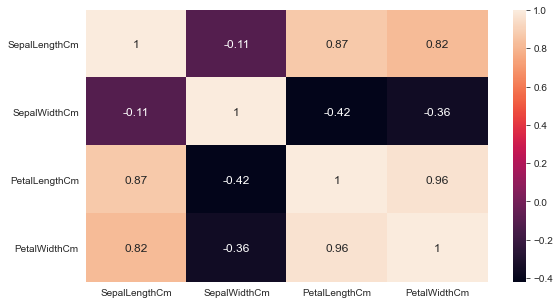

In [52]:
plt.figure(figsize=(9,5))
sns.heatmap(df1.corr(),annot=True,annot_kws={'size':12})

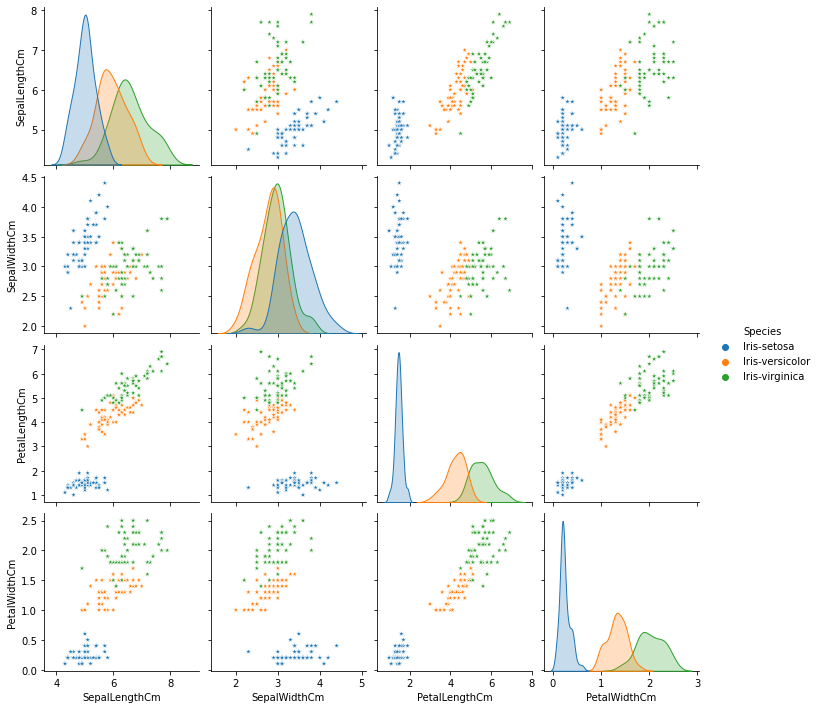

In [25]:
sns.pairplot(df1,hue='Species',markers='*')

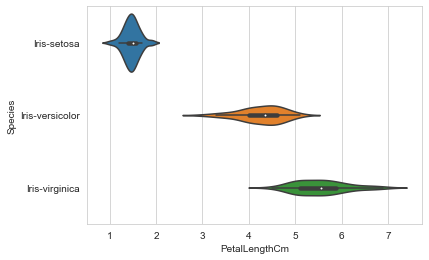

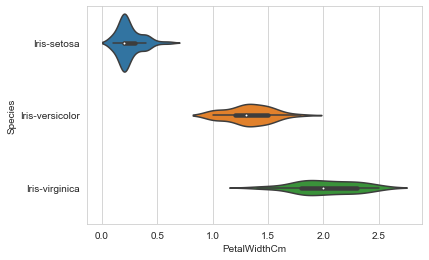

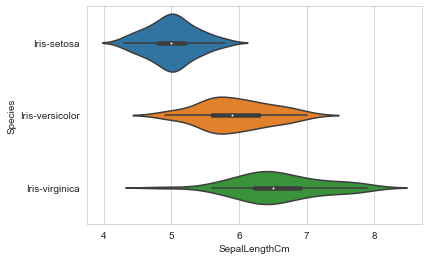

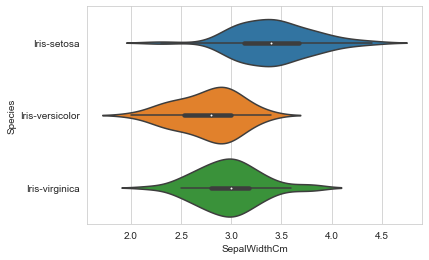

In [65]:
sns.violinplot(x='PetalLengthCm',y='Species',data=df)
plt.show()
sns.violinplot(x='PetalWidthCm',y='Species',data=df)
plt.show()
sns.violinplot(x='SepalLengthCm',y='Species',data=df)
plt.show()
sns.violinplot(x='SepalWidthCm',y='Species',data=df)
plt.show()

## Key Findings from Data Visualization
### After graphing the features in pair plot, it is found that the relationship between pairs of features of a iris-setosa in blue is distinctly different from the other two species.
### The petal length and petal width of iris-setosa is smaller than that of other two species.

## Elbow Method : To find optimum number of clusters

In [152]:
x=df.drop(['Id','Species'],axis=1).values

In [153]:
from sklearn.cluster import KMeans
kmean= KMeans()

C:\Users\91766\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


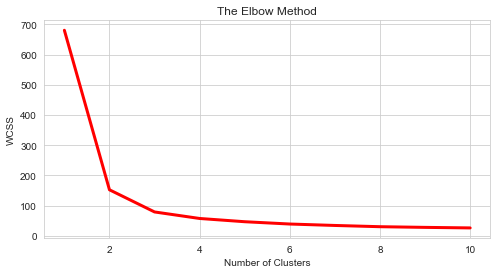

In [154]:
error=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i,max_iter = 300, n_init = 10, random_state = 0)
    kmean.fit(x)
    k.append(i)
    error.append(kmean.inertia_)

plt.figure(figsize=(8,4))
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')#within cluster sum of squares
plt.plot(range(1,11),error,color='red',linewidth=3)   

### One can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.
### From this the number of clusters is chosen as 3.


## Applying KMeans to the Dataset

In [155]:
kmean=KMeans(n_clusters=3)
y_kmeans=kmean.fit_predict(x)

In [173]:
y_kmeans 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [174]:
kmean.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

## Visualizing Clusters on the First Two Columns

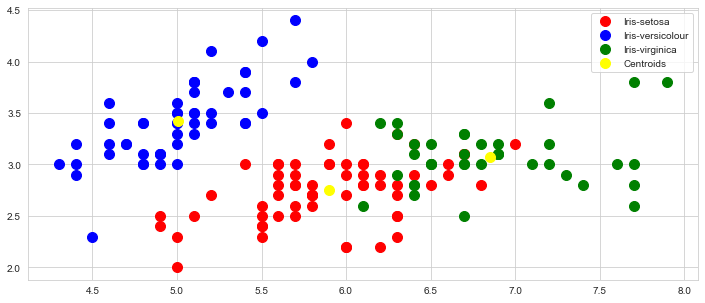

In [169]:
l1=x[y_kmeans==0]
l2=x[y_kmeans==1]
l3=x[y_kmeans==2]
plt.figure(figsize=(12,5))
plt.scatter(l1[:,0],l1[:,1],
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(l2[:,0],l2[:,1],
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(l3[:,0],l3[:,1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

## Visualizing Clusters on the Last Two Columns

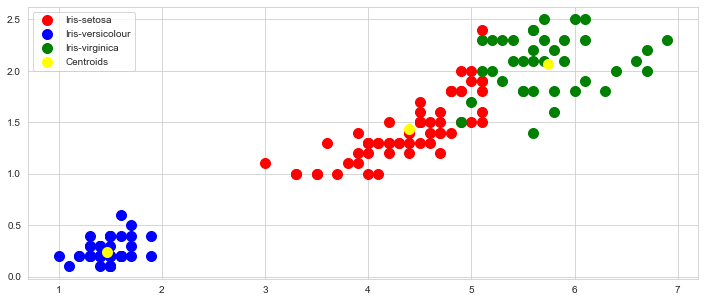

In [171]:
plt.figure(figsize=(12,5))
plt.scatter(l1[:,2],l1[:,3],
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(l2[:,2],l2[:,3],
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(l3[:,2],l3[:,3],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmean.cluster_centers_[:, 2], kmean.cluster_centers_[:,3],
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()